In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read data
df = pd.read_csv("C:\\Users\\shubh\\Downloads\\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.rename(columns={"Delivery Time":"DT","Sorting Time":"ST"},inplace=True)
df

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.describe()

,DT,ST
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x2c291345210>,
 'caps': [<matplotlib.lines.Line2D at 0x2c291345750>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c291344f70>,
 'medians': [<matplotlib.lines.Line2D at 0x2c291345c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x2c291345f30>,
 'means': []}

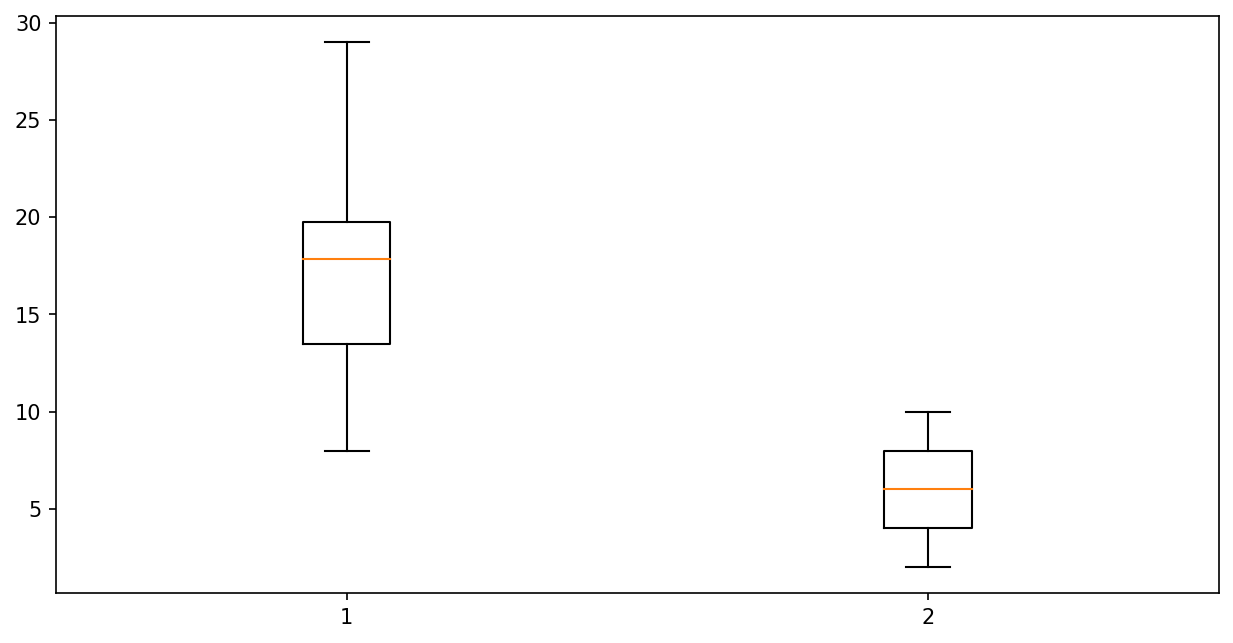

In [5]:
plt.boxplot(df)

In [6]:
df.value_counts()

DT     ST
8.00   2     1
17.90  10    1
24.00  9     1
21.50  5     1
21.00  10    1
19.83  8     1
19.75  6     1
19.00  7     1
18.75  9     1
18.11  7     1
17.83  7     1
9.50   3     1
16.68  7     1
15.35  6     1
14.88  4     1
13.75  6     1
13.50  4     1
12.03  3     1
11.50  3     1
10.75  4     1
29.00  10    1
dtype: int64

<Axes: xlabel='DT', ylabel='ST'>

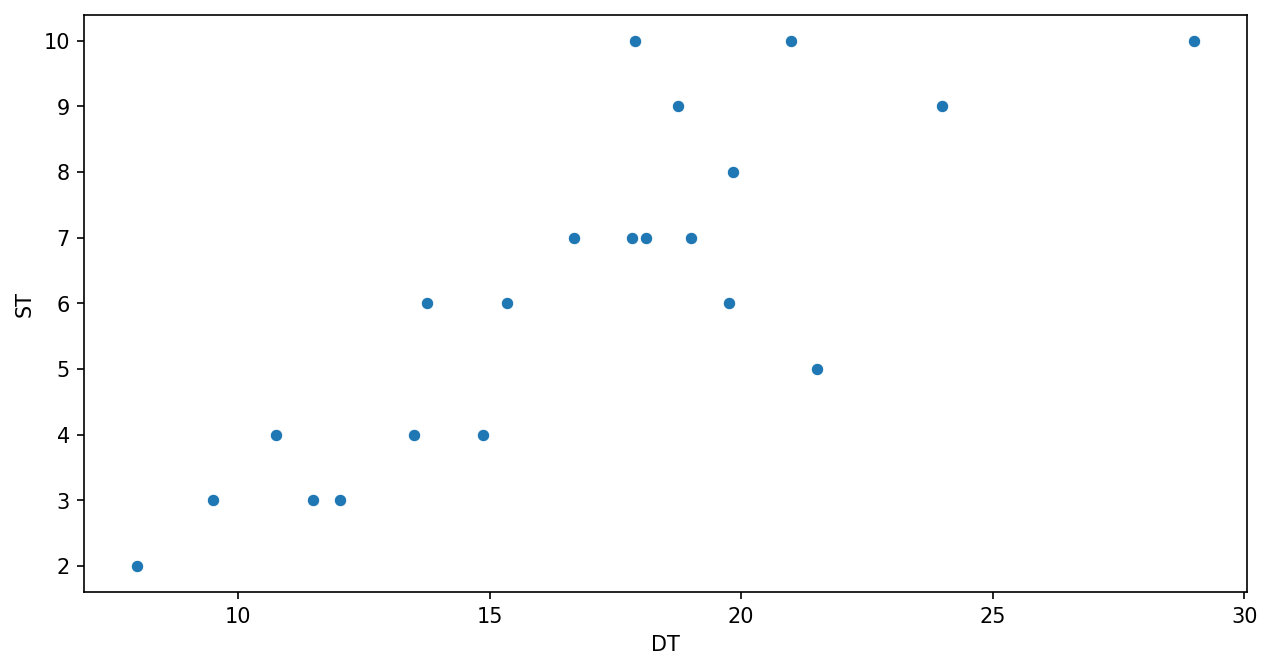

In [7]:
sns.scatterplot(x=df['DT'],y=df['ST'])

<Axes: >

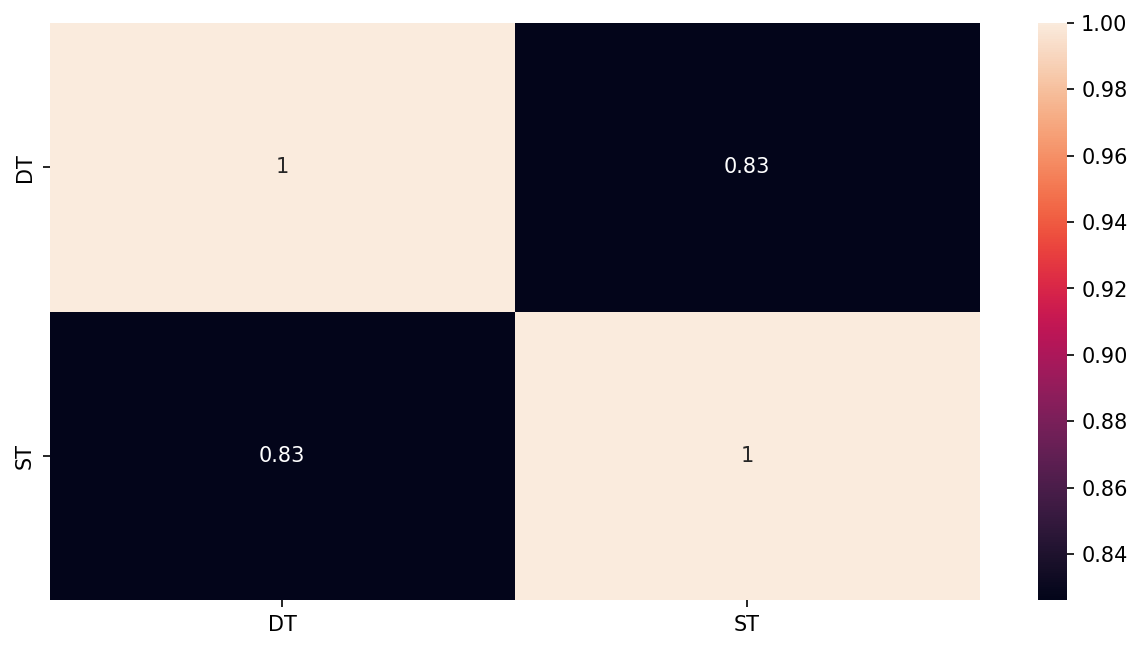

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
import statsmodels.formula.api as smf

In [10]:
model = smf.ols('DT ~ ST',data=df).fit()
model

In [11]:
#Model parameters
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [12]:
#line equation
ST = 21

DT = 1.64*ST+6.5827
DT

41.0227

In [13]:
#Print p value
model.pvalues

Intercept    0.001147
ST           0.000004
dtype: float64

In [14]:
#r2 value
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# For Prediction for new data

In [15]:
df.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [16]:
test = pd.DataFrame({
    'ST' : [100,152,850,654,759]
})
test

,ST
0,100
1,152
2,850
3,654
4,759


In [17]:
model.predict(test)

0     171.484724
1     257.233758
2    1408.249646
3    1085.041746
4    1258.188836
dtype: float64

In [18]:
df['DT'].skew()

0.3523900822831107

In [19]:
df['ST'].skew()

0.047115474210530174

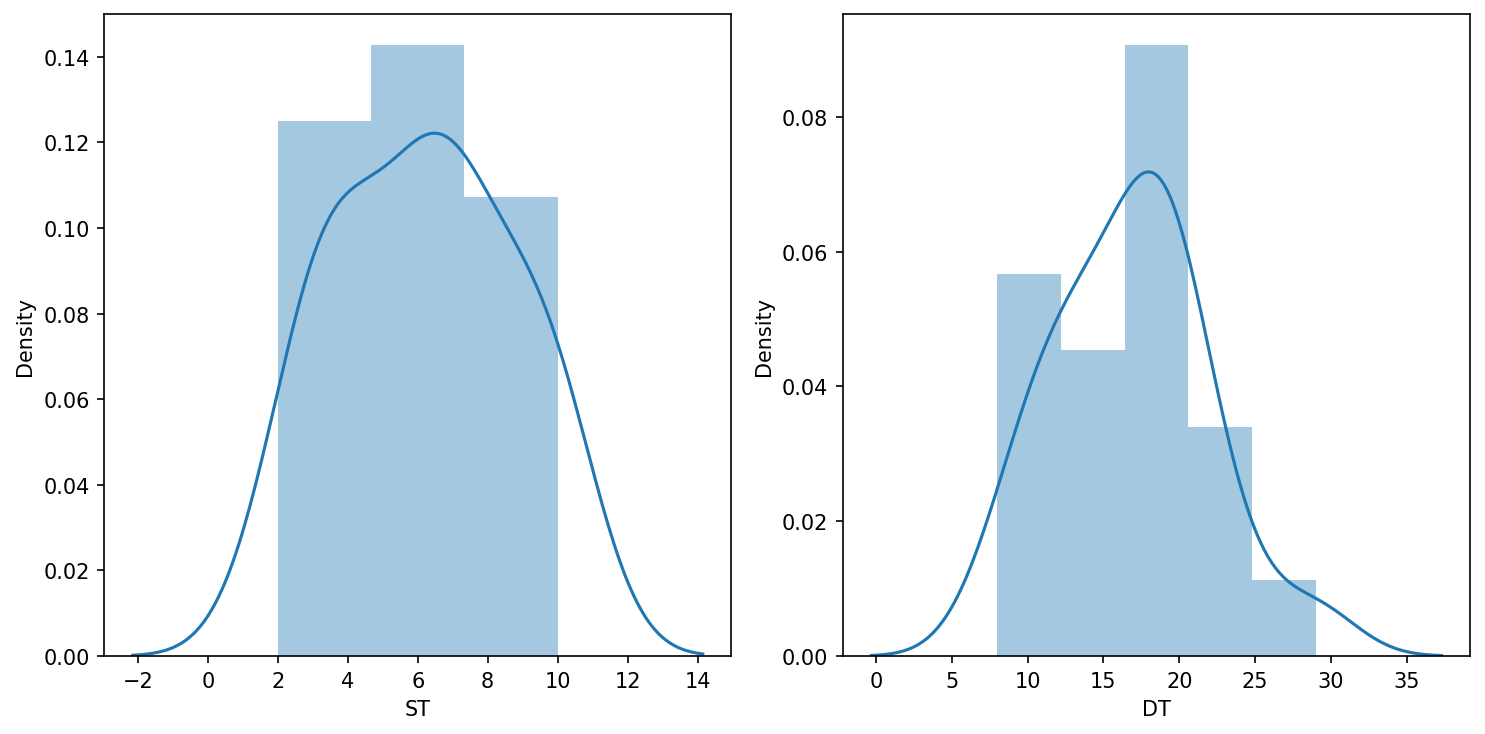

In [20]:
plt.subplot(1,2,1)
sns.distplot(df['ST'])

plt.subplot(1,2,2)
sns.distplot(df['DT'])

plt.tight_layout()

In [22]:
df['ST'].skew()

0.047115474210530174

In [23]:
df['DT'].skew()

0.3523900822831107

# LOG Transformation

In [24]:
df

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [25]:
np.log(df['DT'])

0     3.044522
1     2.602690
2     2.983153
3     3.178054
4     3.367296
5     2.731115
6     2.944439
7     2.251292
8     2.884801
9     2.931194
10    2.987196
11    2.374906
12    2.814210
13    2.442347
14    2.487404
15    2.700018
16    2.621039
17    2.896464
18    2.079442
19    2.880882
20    3.068053
Name: DT, dtype: float64

In [26]:
df['log_DT'] = np.log(df['DT'])
df

,DT,ST,log_DT
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296
5,15.35,6,2.731115
6,19.00,7,2.944439
7,9.50,3,2.251292
8,17.90,10,2.884801
9,18.75,9,2.931194


In [27]:
df['log_ST'] = np.log(df['ST'])
df

,DT,ST,log_DT,log_ST
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585
5,15.35,6,2.731115,1.791759
6,19.00,7,2.944439,1.945910
7,9.50,3,2.251292,1.098612
8,17.90,10,2.884801,2.302585
9,18.75,9,2.931194,2.197225


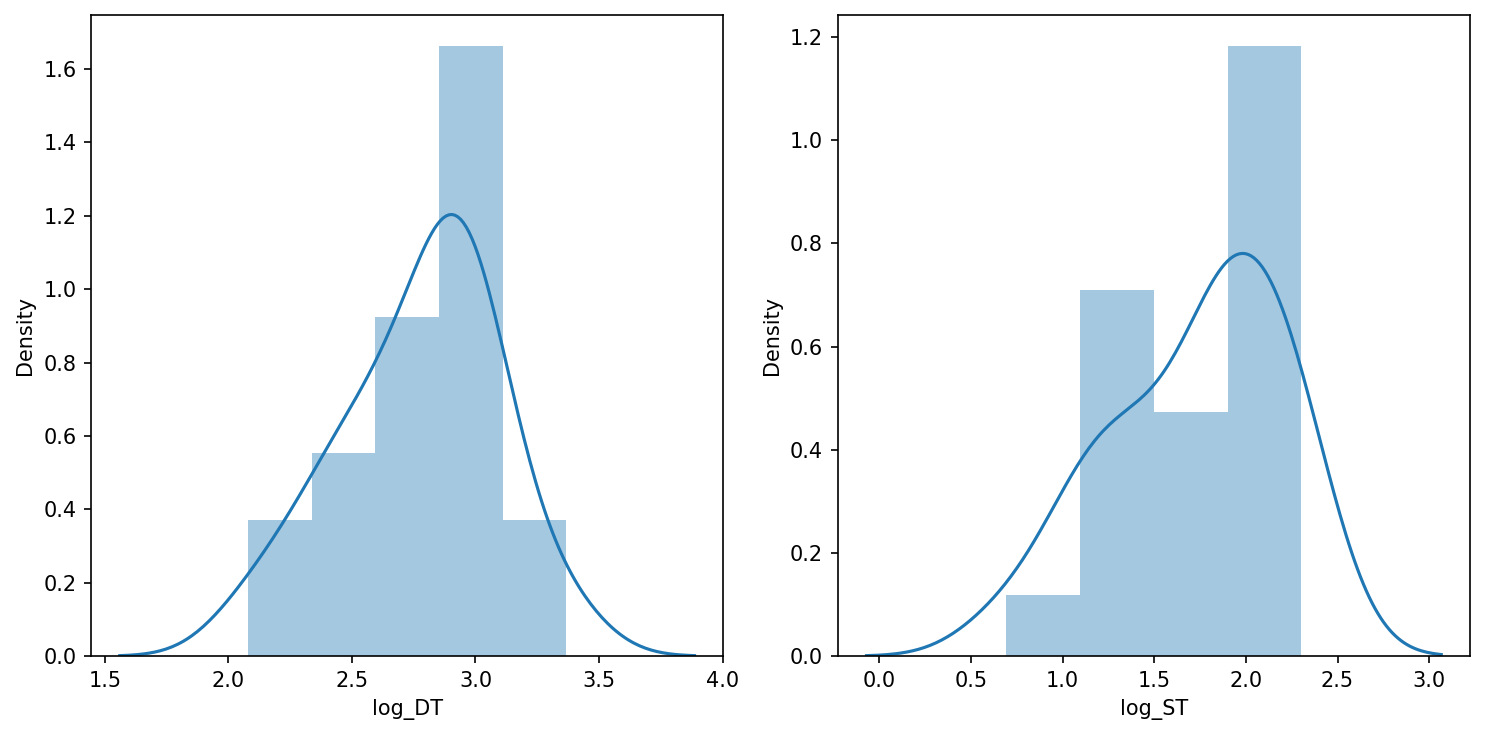

In [28]:
plt.subplot(1,2,1)
sns.distplot(df['log_DT'])

plt.subplot(1,2,2)
sns.distplot(df['log_ST'])

plt.tight_layout()

In [30]:
df['log_DT'].skew(), df['log_ST'].skew()

(-0.4512901148522999, -0.6052357185134765)

# Sqrt Transformation

In [31]:
df['sqrt_DT'] = np.sqrt(df['DT'])
df['sqrt_ST'] = np.sqrt(df['ST'])
df

,DT,ST,log_DT,log_ST,sqrt_DT,sqrt_ST
0,21.00,10,3.044522,2.302585,4.582576,3.162278
1,13.50,4,2.602690,1.386294,3.674235,2.000000
2,19.75,6,2.983153,1.791759,4.444097,2.449490
3,24.00,9,3.178054,2.197225,4.898979,3.000000
4,29.00,10,3.367296,2.302585,5.385165,3.162278
5,15.35,6,2.731115,1.791759,3.917908,2.449490
6,19.00,7,2.944439,1.945910,4.358899,2.645751
7,9.50,3,2.251292,1.098612,3.082207,1.732051
8,17.90,10,2.884801,2.302585,4.230839,3.162278
9,18.75,9,2.931194,2.197225,4.330127,3.000000


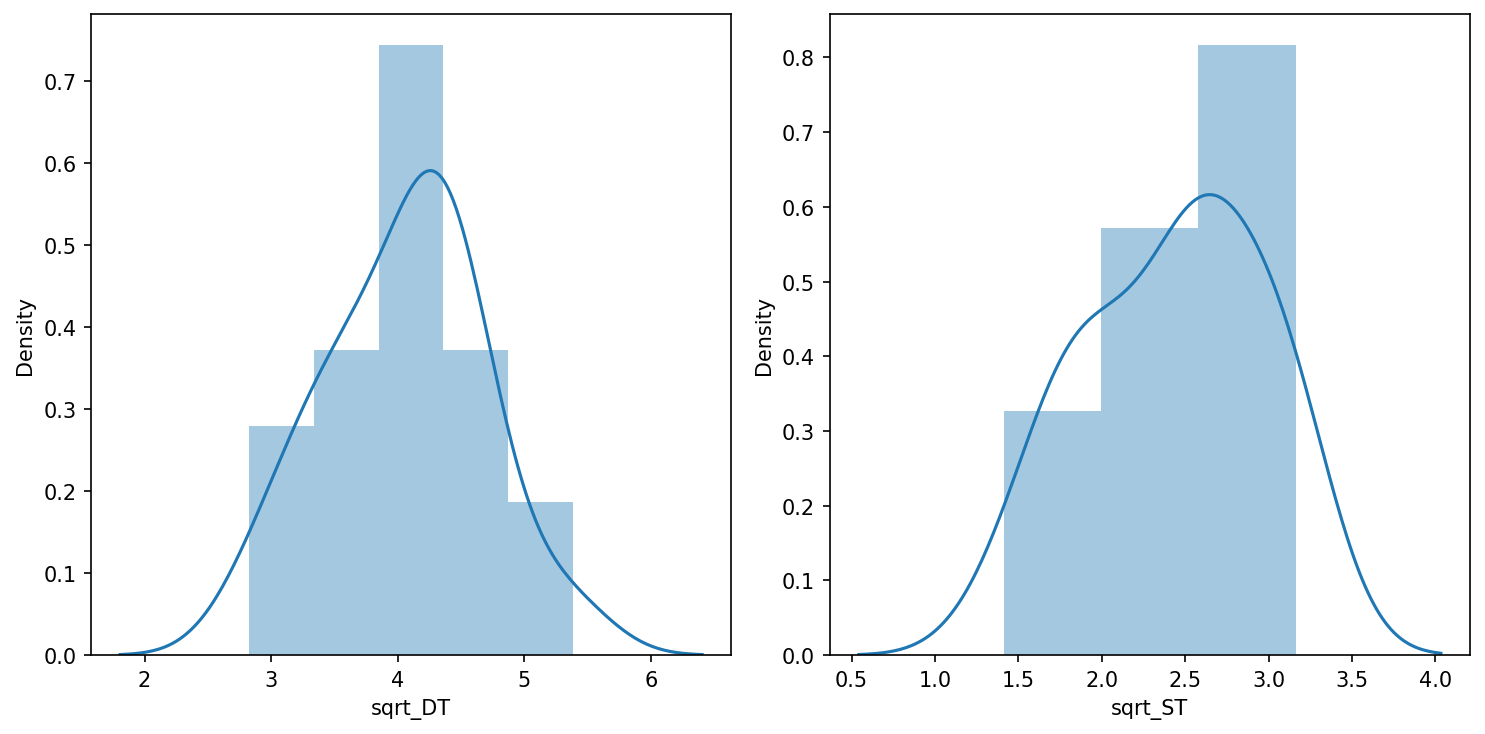

In [32]:
plt.subplot(1,2,1)
sns.distplot(df['sqrt_DT'])

plt.subplot(1,2,2)
sns.distplot(df['sqrt_ST'])

plt.tight_layout()

In [33]:
df['sqrt_DT'].skew()

-0.0618105135865213

In [34]:
df['sqrt_ST'].skew()

-0.25981634723613994